# **SVM Regression with hyperparameter tuning - Grid Search**

Support Vector Machines (SVMs) are a family of supervised learning algorithms that can be used for both classification and regression tasks. In this lab, we will focus on SVMs for regression.

SVMs work by finding a hyperplane that best fits the data in a way that maximises the margin (i.e., the distance between the hyperplane and the closest data points) and minimises the error. In regression, the goal is to predict a continuous target variable rather than classify into categories. Therefore, the hyperplane is selected in such a way that it fits the data as closely as possible while still maintaining the maximum margin.

SVMs can handle both linear and nonlinear regression problems by using kernel functions that map the input data into a higher-dimensional feature space, where a linear hyperplane can be used to make predictions. The most commonly used kernel functions are linear, polynomial, radial basis function (RBF), and sigmoid (classification).

SVMs are known for their good performance in high-dimensional feature spaces and their ability to handle complex datasets. They are robust to noise and outliers and have a solid theoretical foundation. However, SVMs can be sensitive to the choice of hyperparameters such as the kernel function, regularisation parameter, and kernel bandwidth.

In summary, SVMs are powerful and versatile algorithms that can be used for both classification and regression tasks. They are particularly well-suited for high-dimensional feature spaces and complex datasets. However, careful tuning of hyperparameters is required for optimal performance.


1. Import/install the necessary packages
2. Get the data from Google Drive
3. Split the data into training and testing sets
4. Robust scaling 
5. Create an SVM classifier
6. Define the hyperparameter grid to search
7. Search the hyperparameter grid using GridSearchCV()
8. Use the best model provided by the grid search to make predictions on the test data
9. Display R2 and MSE
10. Obtain the feature importance using permutation_importance() and display the feature importance plot


**Import/install the necessary packages**

In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

**Get the data from Google Drive**

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/customer_loyalty_data_Reg.csv") 
print(df.info(),'\n')
print(df.head(),'\n')
print(df.describe(),'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      1000 non-null   int64
 1   Income                   1000 non-null   int64
 2   Num_Purchases            1000 non-null   int64
 3   Average_Rating           1000 non-null   int64
 4   Customer_Service_Rating  1000 non-null   int64
 5   Membership_Duration      1000 non-null   int64
 6   Loyalty                  1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB
None 

   Age  Income  Num_Purchases  Average_Rating  Customer_Service_Rating  \
0   63    4528              1               1                        2   
1   20    2482             14               1                        5   
2   46    1316              1               4                        4   
3   52    3024              4               4                        2   
4   56    3

**Split the data into training and testing sets**

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Loyalty', axis=1), df['Loyalty'], test_size=0.2, random_state=50)

**Robust scaling**

In [4]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Create an SVM classifier**

In [5]:
SVR_model = svm.SVR()

**Define the hyperparameter grid to search**

In [6]:
hyperparameters = {'kernel': ['linear'],
                   'C': [0.1, 1, 10],
                   'gamma': [0.1, 1, 10],
                   'epsilon': [0.1, 0.2, 0.5],
                   #'degree': [2, 3, 4]
                   }

**Search the hyperparameter grid using GridSearchCV()**

In [7]:
grid_search = GridSearchCV(SVR_model, hyperparameters, cv=5)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.1, 0.2, 0.5],
                         'gamma': [0.1, 1, 10], 'kernel': ['linear']})

**Use the best model provided by the grid search to make predictions on the test data**

In [8]:
best_reg = grid_search.best_estimator_
print(best_reg,'\n')
y_pred = best_reg.predict(X_test_scaled)

SVR(C=1, epsilon=0.5, gamma=0.1, kernel='linear') 



**Display R2 and MSE**

In [9]:
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
print("R2 score: %.2f" % r2_score(y_test, y_pred))

MSE: 38.72
R2 score: 0.87


**Display the feature importance**

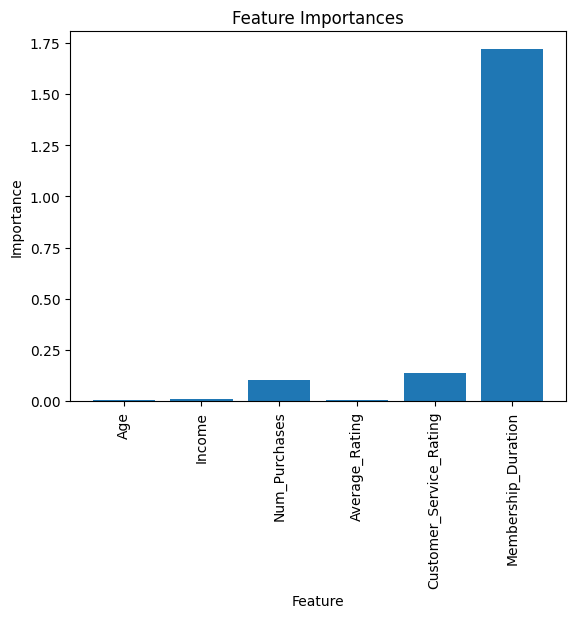

In [10]:
# Instantiate a new SVR model with the best hyperparameters
# best_svr = svm.SVR(kernel='linear', C=0.1, gamma=0.01, epsilon=0.1)
# Fit the model on the training data
# best_svr.fit(X_train_scaled, y_train)
#result = permutation_importance(best_svr, X_test_scaled, y_test, n_repeats=10, random_state=0)

# Compute feature importances using permutation importance
result = permutation_importance(best_reg, X_test_scaled, y_test, n_repeats=10, random_state=0)
importances = result.importances_mean

# Display the Feature Importance
plt.bar(range(X_train.shape[1]), importances)
feature_names = df.columns.tolist()
feature_names.remove("Loyalty")
plt.xticks(range(X_train.shape[1]), feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

# **Exercise 1**

Use the following hyperparameter snippet for the tuning:

In [11]:
hyperparameters = {'kernel': ['linear'],
                   'C': [0.1, 1, 10],
                   'gamma': [0.1, 1, 10],
                   'epsilon': [0.1, 0.2, 0.5],
                   'degree': [2, 3, 4]
                   }

**Exercise 2**

Use Standardisation instead of Robust scaling

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Exercise 3**

Use Min-max scaling instead of Robust scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)